<a href="https://colab.research.google.com/github/Jahan08/LogBB-ML-Model-with-interpretation/blob/main/LogBB_DNN_model_and_model_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Required Libraries

In [ ]:
!pip install rdkit

In [ ]:
!pip install mols2grid
!pip install XlsxWriter

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import io
from PIL import Image
from rdkit.Chem.Draw import rdMolDraw2D


In [ ]:
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import mols2grid
from rdkit.Chem import RDConfig
import pandas as pd
import xlsxwriter
from google.colab import files
import seaborn as sns
np.random.seed(0)
pd.set_option('display.max_rows', None)

In [ ]:
from pathlib import Path
from warnings import filterwarnings
# Silence some expected warnings
filterwarnings("ignore")
from sklearn import metrics
# Deep Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

#Loading Dataset

In [ ]:
def mol2arr(mol, radi=10, nBits=2048):
    arr = np.zeros((1,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radi, nBits)
    DataStructs.ConvertToNumpyArray(fp, arr)

    return arr

In [ ]:
train2_dataset = '/content/BBB_data_all_LogBB_all_Train.sdf'
train2_mols = [m for m in Chem.SDMolSupplier(train2_dataset)]
test2_dataset = '/content/BBB_data_all_LogBB_all_Test.sdf'
test2_mols = [m for m in Chem.SDMolSupplier(test2_dataset)]

In [ ]:
x2_train = np.array([mol2arr(m) for m in train2_mols])
y2_train = np.array([float(m.GetProp('logBB')) for m in train2_mols])

x2_test = np.array([mol2arr(m) for m in test2_mols])
y2_test = np.array([float(m.GetProp('logBB')) for m in test2_mols])

[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerator
[17:15:31] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
print("Shape of training data:", x2_train.shape)
print("Shape of test data:", x2_test.shape)

Shape of training data: (795, 2048)
Shape of test data: (212, 2048)


In [ ]:
external_dataset = ''
external_mols = [m for m in Chem.SDMolSupplier(external_dataset)]
x_external = np.array([mol2arr(m) for m in external_mols])

[17:15:57] DEPRECATION WARNING: please use MorganGenerator
[17:15:57] DEPRECATION WARNING: please use MorganGenerator
[17:15:57] DEPRECATION WARNING: please use MorganGenerator
[17:15:57] DEPRECATION WARNING: please use MorganGenerator
[17:15:57] DEPRECATION WARNING: please use MorganGenerator


# Define Deep Neural Network



In [ ]:
def neural_network_model(hidden1, hidden2, hidden3, hidden4, hidden5, hidden6):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Third hidden layer
    model.add(Dense(hidden3, activation="relu", name="layer3"))
    # Forth hidden layer
    model.add(Dense(hidden4, activation="relu", name="layer4"))
    # Forth hidden layer
    model.add(Dense(hidden4, activation="relu", name="layer5"))
    # Forth hidden layer
    model.add(Dense(hidden4, activation="relu", name="layer6"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer7"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

# Train the model


In [ ]:
# Neural network parameters
batch_sizes = [2, 4, 8]
nb_epoch = 50
layer1_size = 256
layer2_size = 128
layer3_size = 64
layer4_size = 32
layer5_size = 16
layer6_size = 8

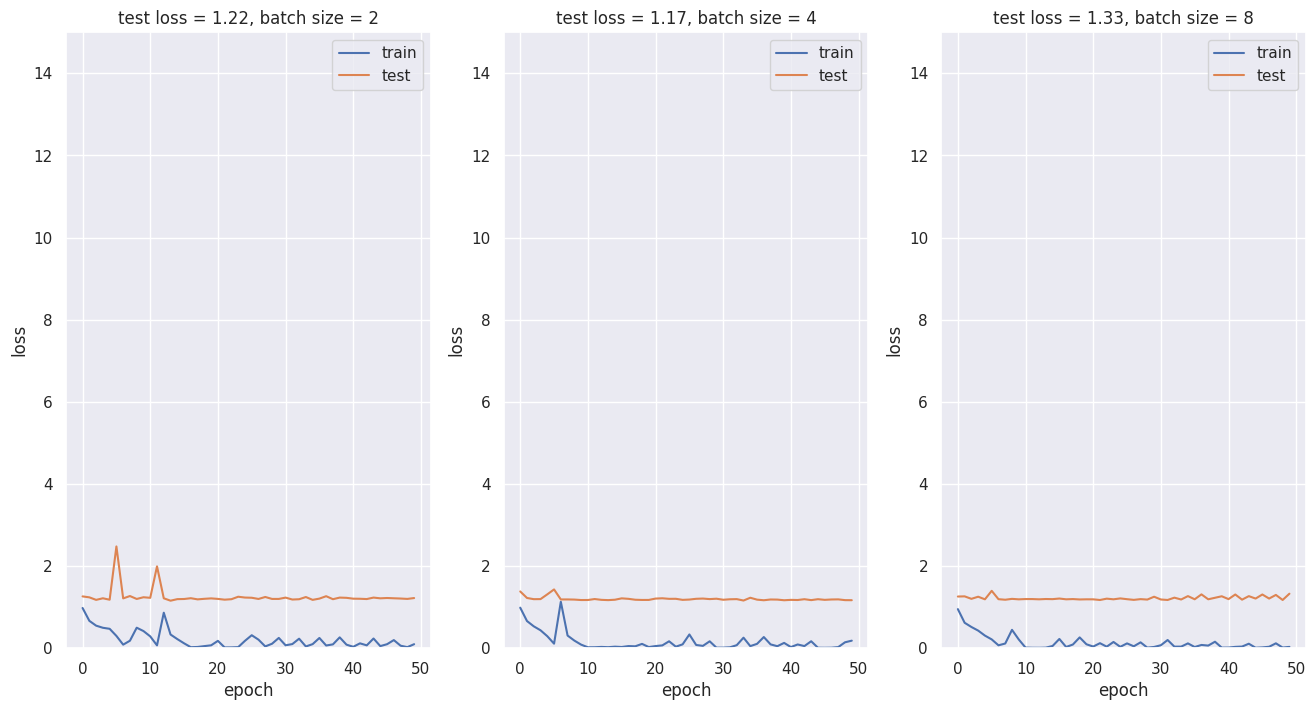

In [ ]:
# Plot
fig = plt.figure(figsize=(16,8))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size, layer3_size, layer4_size, layer5_size, layer6_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x2_train))).astype(float),
        y2_train,
        batch_size=batch,
        validation_data=(np.array(list((x2_test))).astype(float), y2_test),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

In [ ]:
# Save the trained model
filepath = "/content/best_weights.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x2_train))).astype(float),
    y2_train,
    epochs=nb_epoch,
    batch_size=4,
    callbacks=callbacks_list,
    verbose=0,
)

**Save the model**

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "BBB_DNN_Regression_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

**Evaluation & prediction on test set**



In [ ]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x2_test))), y2_test, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.19
 mse (same as loss): 1.19
 mae: 0.51


In [ ]:
# Predict LogBB values on x_test data
y2_pred = model.predict(np.array(list((x2_test))))

# Print 5 first LogBB predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y2_pred[0:5]]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
-0.32
-0.37
-0.37
-2.11
-0.81


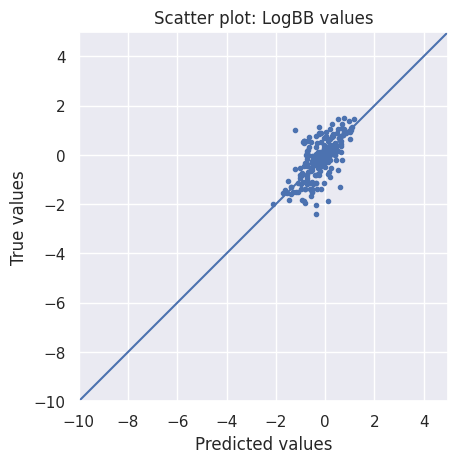

In [ ]:
# Scatter plot
limits = -8, 5
fig, ax = plt.subplots()
ax.scatter(y2_pred, y2_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: LogBB values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

As we can see, there is a positive linear relation between the predicted and true values, but the fit is far from perfect.

#Prediction on external/unlabeled data



**load model from pickle file**

In [ ]:
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Predict pIC50 values on x_test data
y2_ex_pred = model.predict(np.array(list((x_external))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y2_ex_pred[0:5]]
y2_ex_predicted = pd.DataFrame(y2_ex_pred, columns=["predicted_LogBB"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
-0.64
-0.80
-0.43
-0.71
-0.47


# Model Interpretation

In [ ]:
from IPython.display import SVG

In [ ]:
example_mol = Chem.Mol(external_mols[0])
d2d = rdMolDraw2D.MolDraw2DSVG(500,500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(example_mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
example_fp = AllChem.GetMorganFingerprintAsBitVect(example_mol,10)
example_pred = model.predict(np.array([example_fp]))[0]
example_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[17:31:41] DEPRECATION WARNING: please use MorganGenerator


array([-0.63622344], dtype=float32)

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

In [ ]:
res = []
for atm in example_mol.GetAtoms():
    idx = atm.GetIdx()
    fp = SimilarityMaps.GetMorganFingerprint(example_mol,idx)
    pred_val = model.predict(np.array([fp]))[0]
    delta = example_pred - pred_val
    res.append([atm.GetSymbol(),idx,pred_val,delta])
tmp_df = pd.DataFrame(res,columns = ["Atom Type","Atom Index","Predicted Value","Delta"])
tmp_df.sort_values("Delta",ascending=False)

In [ ]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

def get_pred(fp, pred_function):
    fp = np.array([list(fp)])
    return pred_function(fp)[0]

def plot_similarity_map(mol, model):
    d = Draw.MolDraw2DCairo(400, 400)
    SimilarityMaps.GetSimilarityMapForModel(mol,
                                            SimilarityMaps.GetMorganFingerprint,
                                            lambda x : get_pred(x, model.predict),
                                            draw2d=d)
    d.FinishDrawing()
    return d

In [ ]:
df_ex = PandasTools.LoadSDF(" ")

In [ ]:
external_row = 0
external_mol = df_ex.ROMol.values[external_row]
weights = SimilarityMaps.GetAtomicWeightsForModel(external_mol,
                                                   SimilarityMaps.GetMorganFingerprint,
                                                   lambda x: get_pred(x, model.predict))
def GetStandardizedWeights(weights):
  maxWeight = np.max(weights)
  weights = weights / maxWeight
  return weights, maxWeight
weights, maxWeight = GetStandardizedWeights(weights)
fig = Chem.Draw.SimilarityMaps.GetSimilarityMapFromWeights(external_mol, weights.astype(np.double))

